In [1]:
%pylab inline
import h5py
#import sys
import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#import mpl_toolkits.mplot3d.axes3d as axes3d
#import scipy.interpolate as interpolate
masterFilename = "/Users/charlespan/Data/calibrate_012_002_master.h5"

Populating the interactive namespace from numpy and matplotlib


In [2]:
def dispImage(img,min=0,max=1024, log=True):
    ## image plotter ##
      #plt.ion()
      #if img is None: return
      #figure = plt.figure(figsize=(16,8))
      #plt.xlim(0,1000)
      #plt.ylim(600,300)
      #if log:
          #img = np.log(img)
      #pltimg = img.astype(np.float32)
      #im = plt.imshow(pltimg,cmap=cm.nipy_spectral)
      #plt.colorbar()
      #im.set_clim(min,max)
      #plt.draw()
      #input("press enter to continue")
      
    ##this is mine
      plt.ion()
      if img is None: return
      figure = plt.figure(figsize=(16,4))
      #plt.xlim(0,1000)
      #plt.ylim(500,300)
      if log:
          img = numpy.log(img)
      pltimg = img.astype(numpy.float32)
      im = plt.imshow(pltimg,cmap=cm.hot)
      plt.colorbar()
      im.set_clim(min,max)
      plt.draw()
    
      return figure

In [3]:
class ImageReadException(Exception):
    def __init__(self, value):
        self.value = value
    def __str__(self):
        return repr(self.value)

In [4]:
def createLUT(hdf5File):
    LUT = {}
    entry = hdf5File['entry']
    
    for datalink in list(entry['data']):
        if not(datalink[0:4] == 'data'): 
            continue
        
        ### open the link ###
        try:
            data = entry['data'][datalink] 
            #print (data)
        except KeyError as exception: ### cannot open link, probably file does not exist
            continue

        
        ### read the image_nr_low and image_nr_high attributes ###
        image_nr_low  = data.attrs['image_nr_low']
        image_nr_high = data.attrs['image_nr_high']

        for imgNr in range(image_nr_low-1, image_nr_high):
            LUT[imgNr] = (datalink, imgNr-image_nr_low)
    
    return LUT

In [5]:
def readImage(imgNr, LUT, hdf5File):
    datalink = ''
    try:
        (datalink, imageNrOffset) = LUT[imgNr]
    except KeyError as e:
        raise ImageReadException('imgNr ({0}) out of range'.format(imgNr))
    
    
    data = hdf5File['entry']['data'][datalink]
    ### use slicing access to get images with image number imageNrOffset ###
    image = data[imageNrOffset, : , : ] ## z / y / x
    #print(image)
    intensitymatrix = data[-1, :, :]  ## z / y / x
    #print(image.shape)
    #print(image[590:600,450:460]) #row first, then column
    return image ## is a numpy array

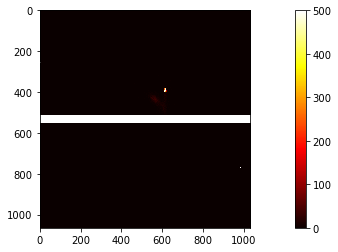

In [27]:
def main():
    #masterFilename = '/Users/charlespan/data/second_79_master.h5'
    hdf5File = h5py.File(masterFilename, 'r')
    #print("Keys: %s" % hdf5File.keys())
    #a_group_key = hdf5File.keys()[0]
    #data = list(hdf5File[a_group_key])
    #print (data)


    ######### NEXUS HEADER ITEMS #########

    ### example: list all entries in /entry/instrument/detector ###
    detector = hdf5File['entry']['instrument']['detector']
    ### example: get the gain settings ###
    #gain_setting = detector['gain_setting']
    #print "gain setting: ", gain_setting[0] ### remark: In NeXus, data is always
                                            ### stored as arrays, even if the data is scalar. 
    




    ######### IMAGES #########

    ### first create the LUT to find the path to the images ###
    
    LUT = createLUT(hdf5File)
    #print (LUT[0])
    ### then read the image imgNr ###
    imgNr = 0
    image = readImage (imgNr, LUT, hdf5File)
    #print(image)
    data = np.array(image)
    flatdata = data.flatten()
    
    #print(image)
    ### do whatever you want with the image ###
    ### e.g. draw the image ###
    
    if mpl:
        smallimage = image
        #print(smallimage)
        dispImage(smallimage,  max=500, log=False)




if __name__=='__main__':
    main()

In [ ]:
def find_area (image):
    for y in range (len(image)):
        f

In [14]:
def find_peak (x_start, y_start, area, log):
    maxintensity, loc_x, loc_y = 0, 0, 0
    for y in range (len(area)): 
        for x in range (len(area[0])):
            val = area[y][x]
            if (val > maxintensity):
                maxintensity = val
                loc_x = x
                loc_y = y
    if log:
        maxintensity = numpy.log(maxintensity)
    return maxintensity, loc_x, loc_y, loc_x + x_start, loc_y + y_start

In [15]:
hdf5File = h5py.File(masterFilename, 'r')
LUT = createLUT(hdf5File)
imgNr = 0
image = readImage (imgNr, LUT, hdf5File)
find_peak(390, 525, image[390:475,525:600], True)

(3.8286413964890951, 36, 44, 426, 569)